In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from diff_utils import *
import pandas as pd
from db_utils import query_hive_ssh
import re
import copy
import dateutil 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get Blocked Users' User Talk edit count

In [20]:
query = """
SELECT
    user_text,
    COUNT(*) num_user_talk_revs
FROM
    enwiki.blocked_user_talk_diff_no_admin
GROUP
    BY user_text
"""

user_talk_revs_per_user_df = query_hive_ssh(query, 'random_sample.tsv', priority = True)
user_talk_revs_per_user_df = user_talk_revs_per_user_df.sort_values(by = 'num_user_talk_revs')
user_talk_revs_per_user_df.tail(15)

,user_text,num_user_talk_revs
731,Anthonyhcole,7012
1274,Skookum1,7232
2222,Calton,8458
887,Elonka,8514
1906,7&6=thirteen,8910
2508,Malik Shabazz,11462
2231,ChildofMidnight,11820
1349,Tony Sidaway,12151
2397,Ikip,12799
2445,Jpgordon,13573


### Inspect Prolific Users

In [21]:
def inspect_user(user):

    print('User: ', user)
    print('https://en.wikipedia.org/wiki/User:%s' % user.replace(' ',  '_'))


    query = """
    SELECT
        *
    FROM
        enwiki.blocked_user_talk_diff_no_admin diffs
    WHERE
        user_text = '%(user)s'
    """

    params = {'user': user}

    df = query_hive_ssh(query % params, 'random_sample.tsv', priority = True, quoting=3)
    df.columns = [c.replace('diffs.', '') for c in df.columns]
    
    
    print('\n\nCleaning Stats')
    print('Raw:', df.shape[0])
    clean_df = clean(df)
    print('Cleaned: ', clean_df.shape[0])
    reduced_df = exclude_few_tokens(clean_df, 3)
    print('No Few Words: ', reduced_df.shape[0])
    reduced_df = exclude_short_strings(reduced_df, 20)
    print('No Few Chars: ', reduced_df.shape[0])
    
    
    print('\n\n')
    print_user_history(reduced_df.sample(n=10), user)
    
    print('\n\nPost per month')
    df['timestamp'] = df['rev_timestamp'].apply(dateutil.parser.parse)
    df['month'] = df['timestamp'].apply(lambda x: x.replace(day = 1, hour=0, minute=0, second=0, microsecond=0))
    df['month'].value_counts().plot()
    
    return reduced_df

User:  Malleus Fatuorum
https://en.wikipedia.org/wiki/User:Malleus_Fatuorum


Cleaning Stats
Raw: 24568
Cleaned:  23341
No Few Words:  20533
No Few Chars:  20112



################################################################################
History for user:  Malleus Fatuorum

Block History
Log Event #:  1
Action: unblock
Time: 2010-10-15T01:42:35Z
Reason: borderline personal attack if any; block is not going to solve anything
Parameters: 
################################################################################


User:  Malleus Fatuorum
User Talk Page:  Eric Corbett
Timestamp:  2009-03-22T01:45:45Z


For leisure? Have you seen the Manchester Small-Scale Experimental Machine's FAC? Makes RfA look like a walk in the park. -) 

I was daft enough to do it because I believed in what I thought was the purpose of this site, free information freely available to everyone. More fool me.  Fatuorum 
________________________________________________________________________________


Use

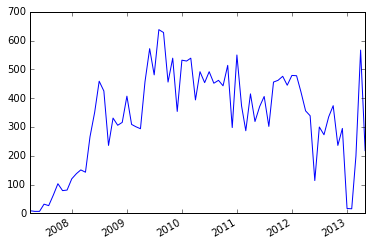

In [22]:
df = inspect_user('Malleus Fatuorum')

User:  Viriditas
https://en.wikipedia.org/wiki/User:Viriditas


Cleaning Stats
Raw: 22548
Cleaned:  20714
No Few Words:  15434
No Few Chars:  15050



################################################################################
History for user:  Viriditas

Block History
Log Event #:  1
Action: block
Time: 2015-11-18T16:12:11Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: I hate civility blocks, but this was just too far over the line, and not a one-off
Parameters: a:2:{s:11:"5::duration";s:8:"72 hours";s:8:"6::flags";s:8:"nocreate";}
Log Event #:  2
Action: reblock
Time: 2015-11-18T22:15:20Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: Using talk page to continue making attacks. Ignored the first few times, but it is ongoing.
Parameters: a:2:{s:11:"5::duration";s:34:"16:12, 18 November 2015 + 72 hours";s:8:"6::flags";s:19:"nocreate,nousertalk";}
##########################################################

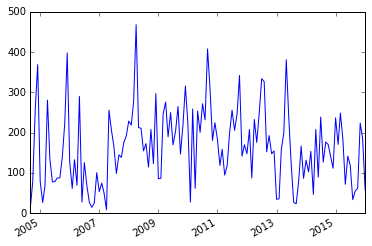

In [23]:
df = inspect_user('Viriditas')

User:  The Rambling Man
https://en.wikipedia.org/wiki/User:The_Rambling_Man


Cleaning Stats
Raw: 19782
Cleaned:  17959
No Few Words:  16787
No Few Chars:  16380



################################################################################
History for user:  The Rambling Man

Block History
Log Event #:  1
Action: block
Time: 2016-01-11T20:33:33Z
Reason: harassment, proxying for banned editors
Parameters: a:2:{s:11:"5::duration";s:8:"48 hours";s:8:"6::flags";s:19:"nocreate,nousertalk";}
################################################################################


User:  The Rambling Man
User Talk Page:  Pedro
Timestamp:  2007-06-14T16:31:35Z


Hey, well if I'm about you can always ask me to lend an administrating hand...!   
________________________________________________________________________________


User:  The Rambling Man
User Talk Page:  Betacommand
Timestamp:  2007-10-27T17:09:04Z


It's down to laziness from uploaders.  Simple as that.  Fair Use rationales are well

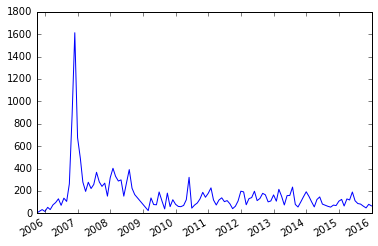

In [24]:
df = inspect_user('The Rambling Man')

User:  Pigsonthewing
https://en.wikipedia.org/wiki/User:Pigsonthewing


Cleaning Stats
Raw: 18568
Cleaned:  15896
No Few Words:  12596
No Few Chars:  12368



################################################################################
History for user:  Pigsonthewing

Block History
Log Event #:  1
Action: block
Time: 2005-12-05T22:11:51Z
Reason: harassment of editors, gaming ArbCom preliminary injunction - posting on [[WP:AN/I]]
Parameters: 1 week
Log Event #:  2
Action: block
Time: 2005-12-06T05:03:46Z
Reason: Breach of personal attack injunction.  Adjusted down from a prior seven-day block.
Parameters: 41 hours
################################################################################


User:  Pigsonthewing
User Talk Page:  Rich Farmbrough
Timestamp:  2008-08-25T15:59:54Z


 foramt of br eleents 

Sorry, I seem to have found [Wikipedia:Village pump (technical)# another chore for SmackBot].  | Talk to Andy Mabbett 
___________________________________________________________

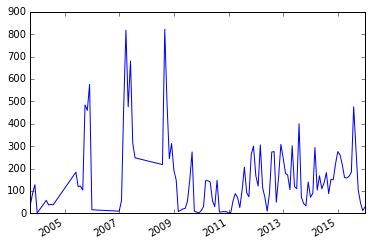

In [25]:
df = inspect_user('Pigsonthewing')

User:  Sitush
https://en.wikipedia.org/wiki/User:Sitush


Cleaning Stats
Raw: 15660
Cleaned:  14898
No Few Words:  13798
No Few Chars:  13519



################################################################################
History for user:  Sitush

Block History
Log Event #:  1
Action: block
Time: 2015-11-16T00:58:57Z
Reason: [[WP:No personal attacks|Personal attacks]] or [[WP:Harassment|harassment]]: Warned, repeated attacks
Parameters: a:2:{s:11:"5::duration";s:8:"24 hours";s:8:"6::flags";s:8:"nocreate";}
Log Event #:  2
Action: unblock
Time: 2015-11-16T04:01:12Z
Reason: This must be some mistake, as the user had not repeated any personal attack (or indeed edited the page in question again) after being warned. Surely no admin would block merely over insufficient deference versus themselves?
Parameters: a:0:{}
################################################################################


User:  Sitush
User Talk Page:  Roltz
Timestamp:  2011-02-24T01:14:45Z


I'm not convinced 

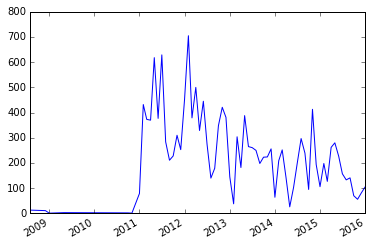

In [26]:
df = inspect_user('Sitush')